In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sd_train = pd.read_csv("D:/Assignment/Assingments/Naive Bayes/SalaryData_Train.csv")
sd_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
sd_test = pd.read_csv("D:/Assignment/Assingments/Naive Bayes/SalaryData_Test.csv")
sd_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
sd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
sd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
sd_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
sd_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

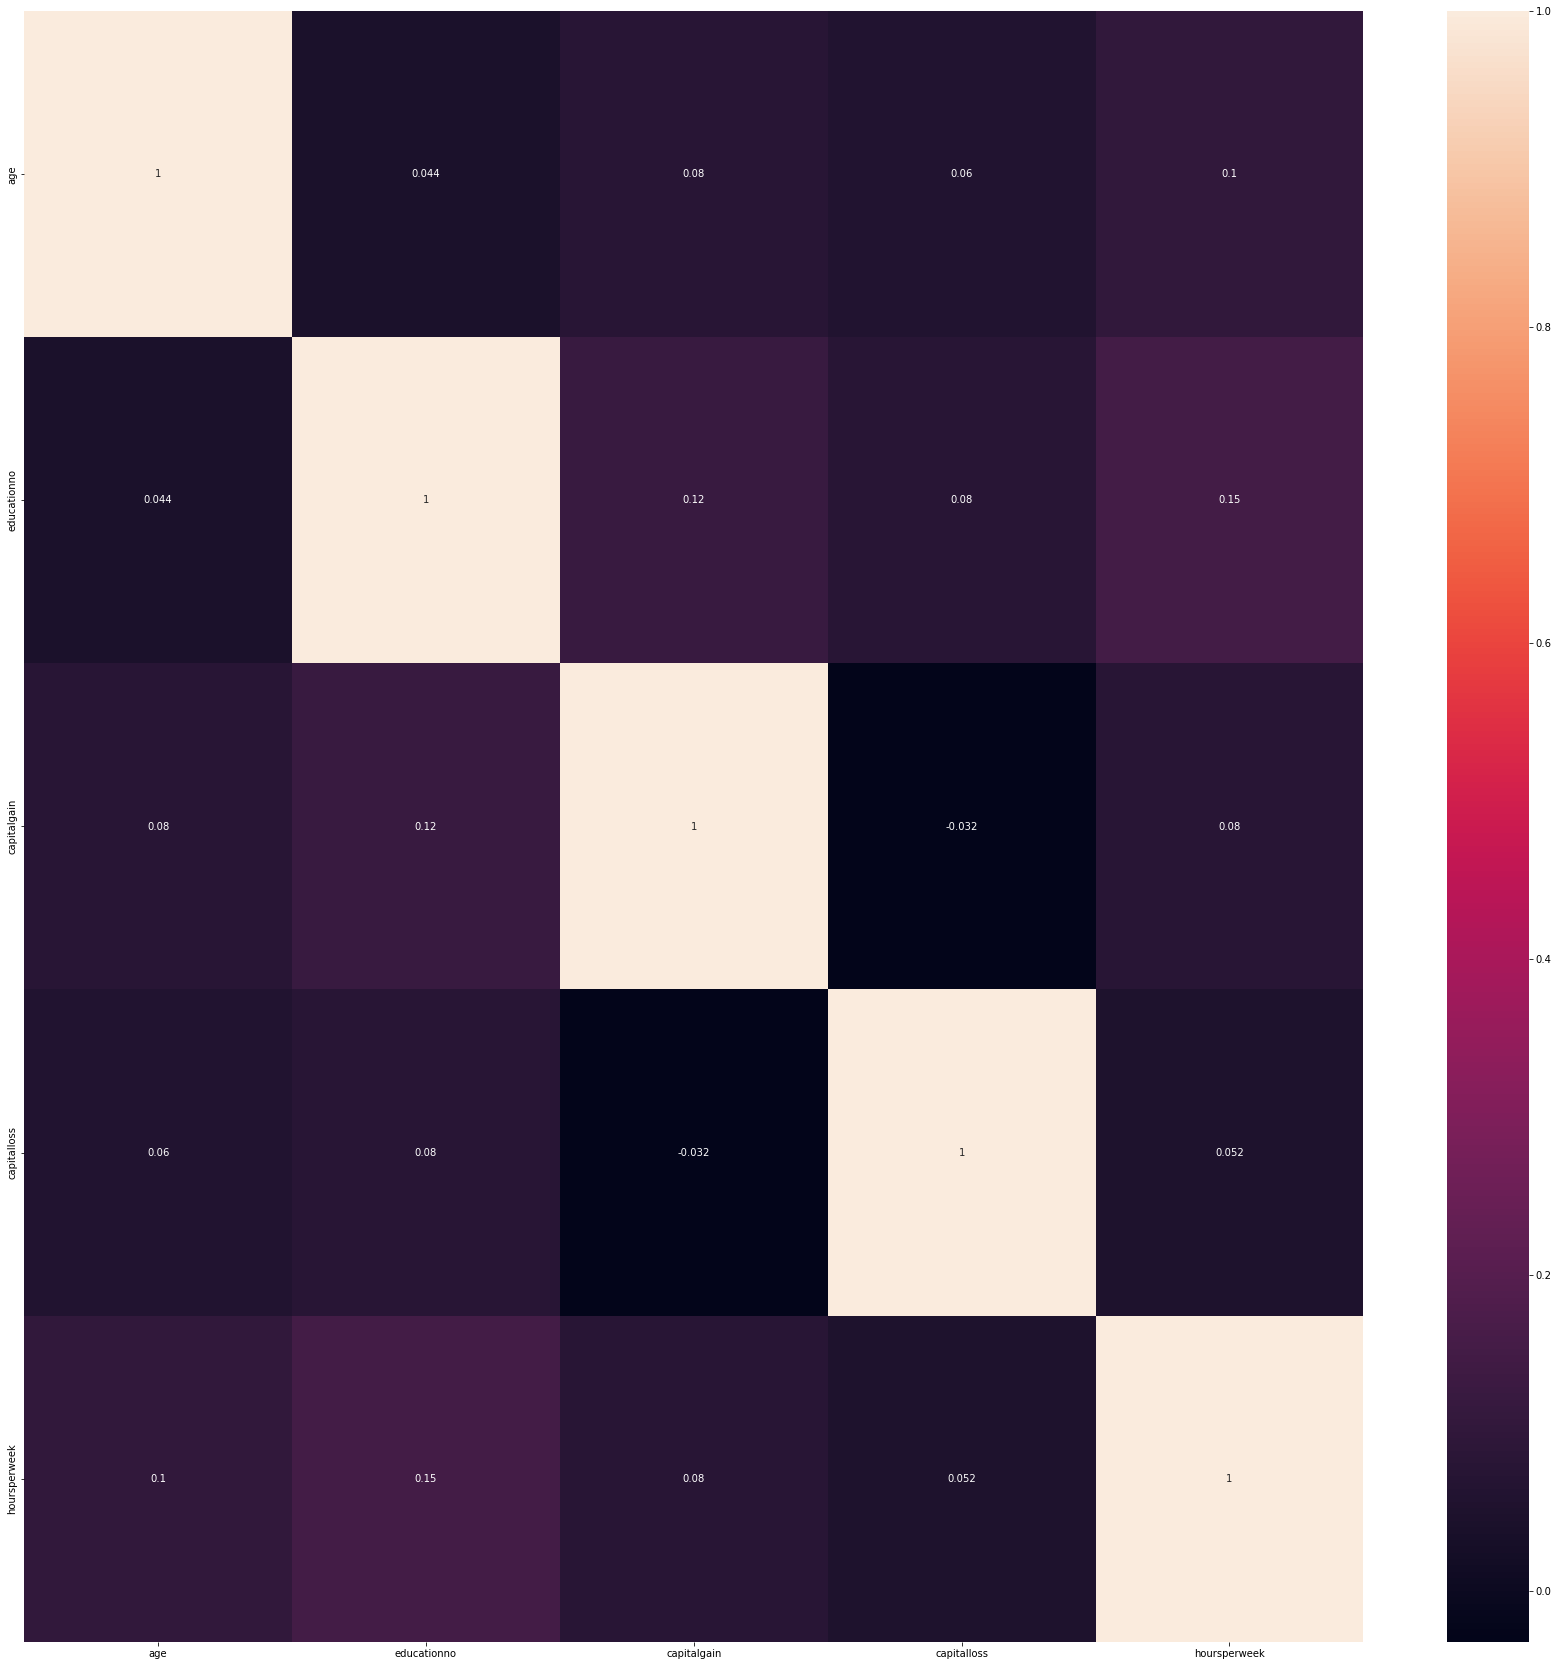

In [9]:
correlation =sd_train.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation,annot=True)
plt.show()

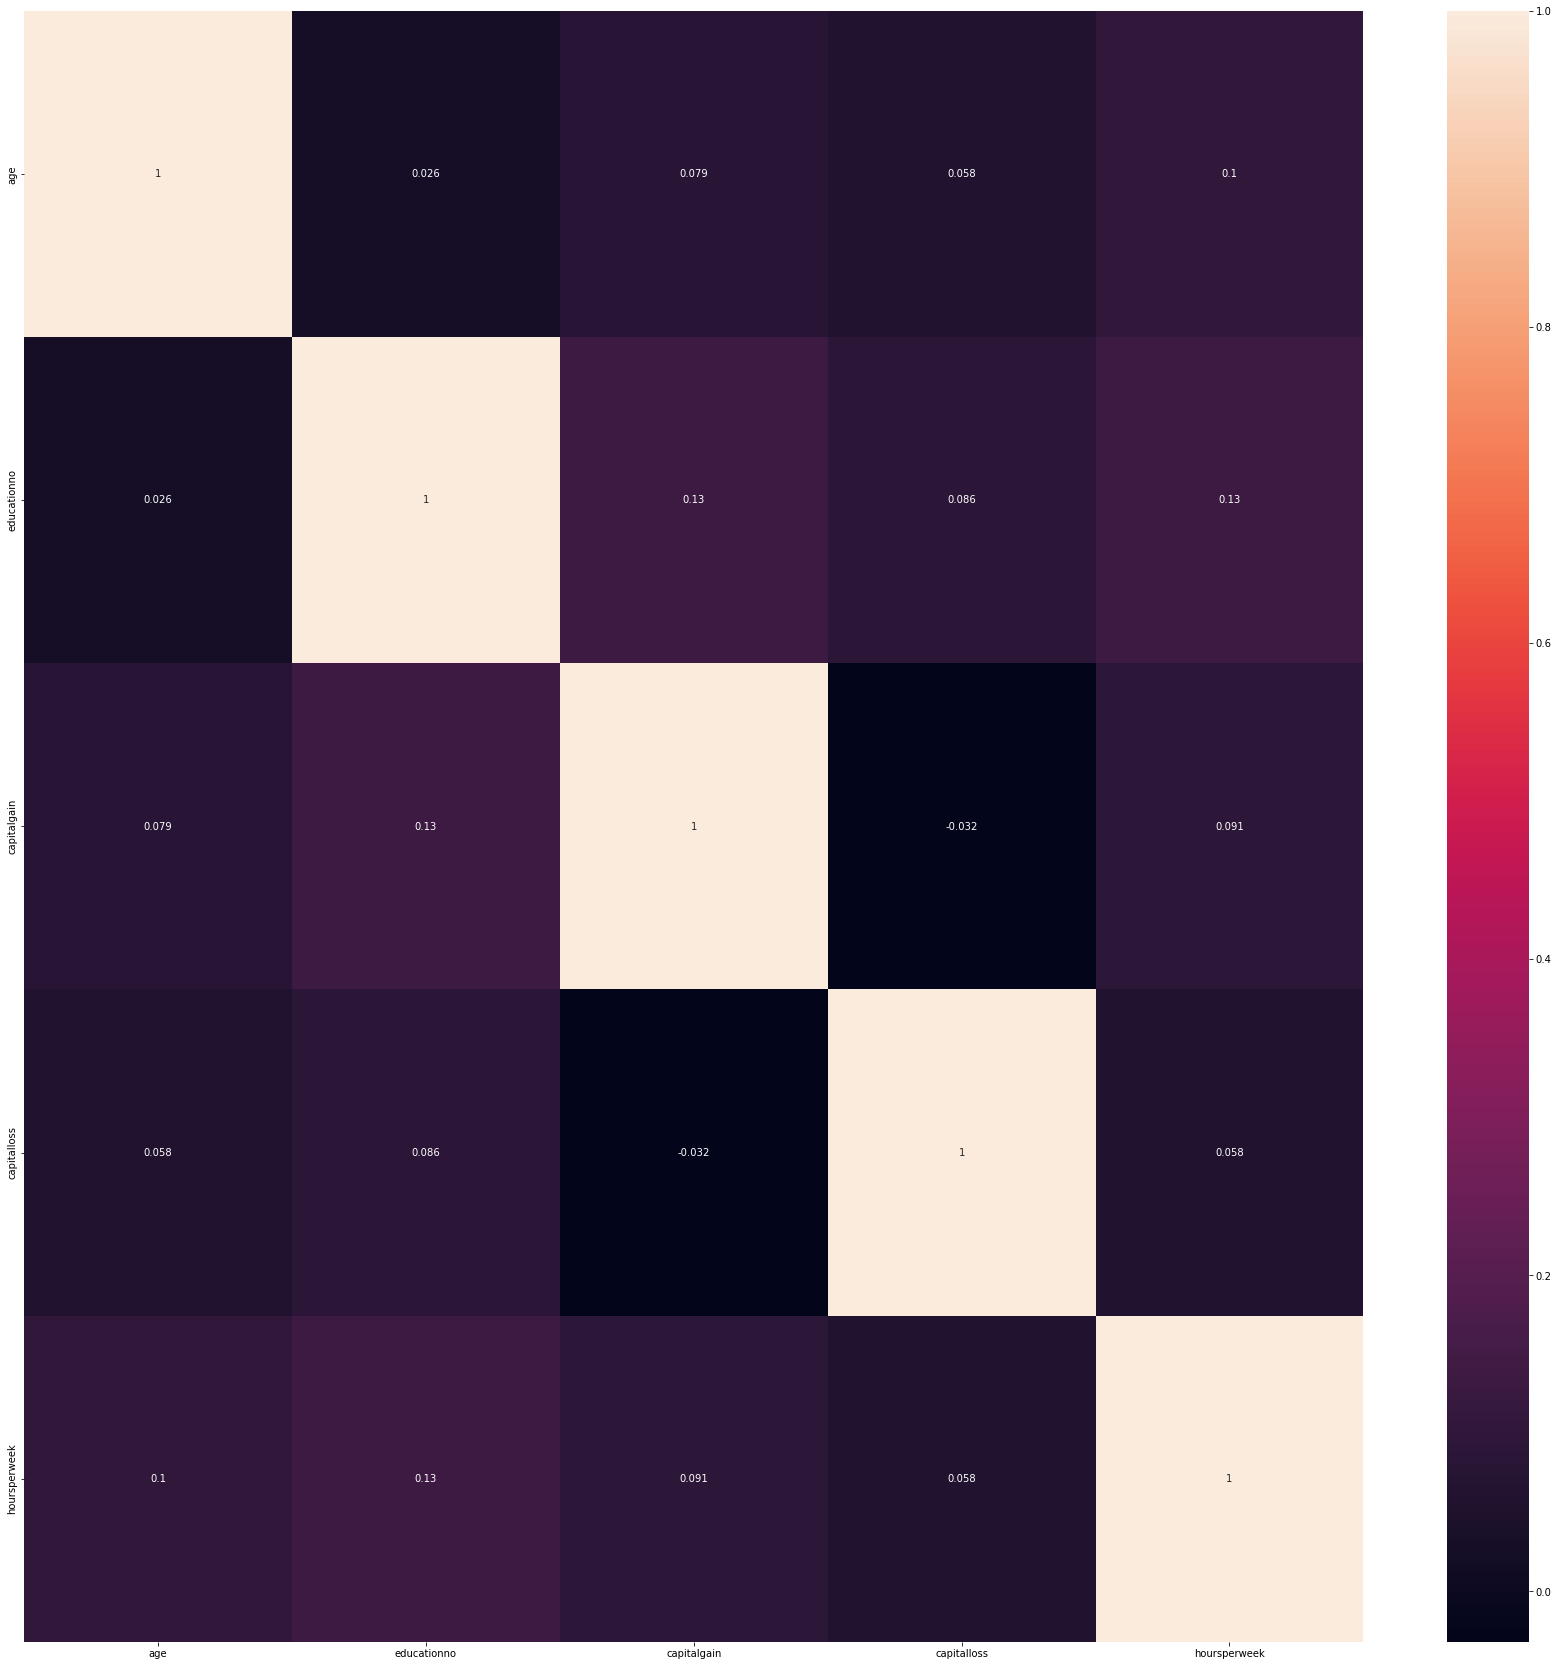

In [10]:
correlation =sd_test.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation,annot=True)
plt.show()

In [11]:
sd_train.columns
sd_test.columns
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [12]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [13]:
for i in string_columns:
    sd_train[i]=label_encoder.fit_transform(sd_train[i])
    sd_test[i]=label_encoder.fit_transform(sd_test[i])

In [14]:
col_names=list(sd_train.columns)
train_X=sd_train[col_names[0:13]]
train_Y=sd_train[col_names[13]]
test_x=sd_test[col_names[0:13]]
test_y=sd_test[col_names[13]]

In [15]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()
train_pred_gau=Gmodel.fit(train_X,train_Y).predict(train_X)
test_pred_gau=Gmodel.fit(train_X,train_Y).predict(test_x)

In [16]:
train_acc_gau=np.mean(train_pred_gau==train_Y)
test_acc_gau=np.mean(test_pred_gau==test_y)
train_acc_gau
test_acc_gau

0.7946879150066402

In [17]:
#Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
Mmodel=MultinomialNB()
train_pred_multi=Mmodel.fit(train_X,train_Y).predict(train_X)
test_pred_multi=Mmodel.fit(train_X,train_Y).predict(test_x)

In [18]:
train_acc_multi=np.mean(train_pred_multi==train_Y)
test_acc_multi=np.mean(test_pred_multi==test_y)
train_acc_multi
test_acc_multi

0.7749667994687915